In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from recreate_graph import get_trained_model, graph_to_training_dataframe, preprocess_dataframe

from graph import attach_graph_attributes
from real_graphs import load_dataset_to_graph, attach_real_attributes

In [34]:
dataset_name = 'moreno_sheep' #'petster-hamster'
dataset_path = os.path.join('prepared_datasets', dataset_name)
delimiter = '\t'

df_dirpath = os.path.join('prepared_training_dfs', dataset_name)

In [43]:
if not os.path.exists(df_dirpath):
    print('Creating dataframes')
    graph = load_dataset_to_graph(dataset_path)
    
    max_nodes = 250
    overlimit_nodes = graph.number_of_nodes() - max_nodes
    if overlimit_nodes > 0:
        print('Cutting nodes up to {}'.format(max_nodes))
        random.seed(93)
        nodes_to_remove = random.sample(graph.nodes(), overlimit_nodes)
        graph.remove_nodes_from(nodes_to_remove)
       
    
    os.mkdir(df_dirpath)
    # with graph attrs
    graph_attrs_path = os.path.join(df_dirpath, 'graph_attrs.csv')

    attach_graph_attributes(graph)

    df = graph_to_training_dataframe(graph)
    df = preprocess_dataframe(df, graph.number_of_nodes())
    df.to_csv(graph_attrs_path, sep=delimiter, index=False)
    # clear data
    for node in graph:
        keys = list(graph.nodes[node].keys())
        for key in keys:
            del graph.nodes[node][key]
    # with real attrs
    real_attrs_path = os.path.join(df_dirpath, 'real_attrs.csv')

    attach_real_attributes(graph, dataset_path)

    df = graph_to_training_dataframe(graph)
    df = preprocess_dataframe(df, graph.number_of_nodes())
    df.to_csv(real_attrs_path, sep=delimiter, index=False)
    # clear data
    for node in graph:
        keys = list(graph.nodes[node].keys())
        for key in keys:
            del graph.nodes[node][key]
    # with graph and real attrs
    graph_real_attrs_path = os.path.join(df_dirpath, 'graph_real_attrs.csv')

    attach_graph_attributes(graph)
    attach_real_attributes(graph, dataset_path)

    df = graph_to_training_dataframe(graph)
    df = preprocess_dataframe(df, graph.number_of_nodes())
    df.to_csv(graph_real_attrs_path, sep=delimiter, index=False)
    print('Done')

In [44]:
#for df_path in ['graph_attrs.csv', 'real_attrs.csv', 'graph_real_attrs.csv']:
df_path = 'graph_real_attrs.csv'
path = os.path.join(df_dirpath, df_path)

df = pd.read_csv(path, delimiter=delimiter)
X_test = df.drop(['num_of_edges'], axis=1)
y_test = df['num_of_edges']

model = get_trained_model(df, epochs=4, batch_size=64)

y_pred = model.predict(X_test)

Epoch 1/4
784/784 [==============================] - 0s 192us/step - loss: 0.0243 - acc: 0.6811
Epoch 2/4
784/784 [==============================] - 0s 17us/step - loss: 0.0227 - acc: 0.6811
Epoch 3/4
784/784 [==============================] - 0s 14us/step - loss: 0.0218 - acc: 0.6811
Epoch 4/4
784/784 [==============================] - 0s 115us/step
loss: 0.02116913831203568, accuracy: 0.6811224489795918


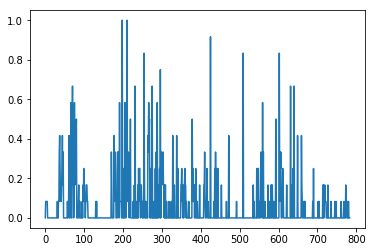

In [45]:
plt.plot(y_test[:1000])
plt.show()

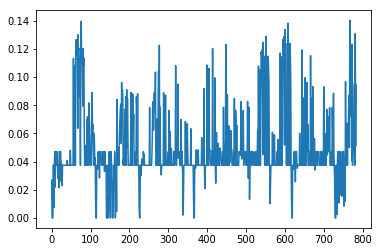

In [47]:
plt.plot(y_pred[:1000])
plt.show()